# Exercise 1

In [2]:
import sympy as sp



if 'beta_z' not in globals():
    beta_z = sp.symbols('beta_z')

# ensure y is defined (use existing y if present, otherwise create it)
if 'y' not in globals():
    y = sp.symbols('y')

#  vector α = 2ŷ + β_zẑ
alpha = sp.Matrix([0, 2, beta_z])

#  vector β = 4y𝑥̂ + ẑ
vec_b = sp.Matrix([4*y, 0, 1])

# Calculate and print the inner (dot) product of α and β
dot = sp.simplify(alpha.dot(vec_b))
print("Inner product (dot):", dot)

# Calculate and print the outer (cross) product of α and β
cross = sp.simplify(alpha.cross(vec_b))
print("Outer product (cross):")
sp.pprint(cross)

Inner product (dot): beta_z
Outer product (cross):
⎡   2   ⎤
⎢       ⎥
⎢4⋅β_z⋅y⎥
⎢       ⎥
⎣ -8⋅y  ⎦


In [3]:
import sympy as sp
"""
β) Για τη συνάρτηση f(x,y) = xy - 3x^2, να υπολογισθούν:
Οι μερικές παράγωγοι df/dx και df/dy και η κλίση της ∇f.
Όπου ∇ = (∂/∂x)x̂ + (∂/∂y)ŷ + (∂/∂z)ẑ
"""

# Define the symbols
x, y = sp.symbols('x y')

# Define the function f(x, y)
f = x * y - 3 * x**2

# partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

gradient = f"({df_dx})𝑥̂, {df_dy}ŷ"


print("∂f/∂x =", df_dx)  
print("∂f/∂y =", df_dy)  
print("Gradient vector ∇f =", gradient)

∂f/∂x = -6*x + y
∂f/∂y = x
Gradient vector ∇f = (-6*x + y)𝑥̂, xŷ


In [4]:

import sympy as sp
if 'z' not in globals():
    z = sp.symbols('z')

# a = (0, x^2, z)
vec_a = sp.Matrix([0, x**2, z])
# print("Vector a:")
# sp.pprint(vec_a)

# divergence of a: ∇⋅a = d(0)/dx + d(x^2)/dy + d(z)/dz
div_a = sp.diff(vec_a[0], x) + sp.diff(vec_a[1], y) + sp.diff(vec_a[2], z)

# Compute curl of a: ∇×a
curl_a = sp.Matrix([
    sp.diff(vec_a[2], y) - sp.diff(vec_a[1], z),
    sp.diff(vec_a[0], z) - sp.diff(vec_a[2], x),
    sp.diff(vec_a[1], x) - sp.diff(vec_a[0], y)
])

print("Divergence of a:", div_a)
print("Curl of a:")
sp.pprint(curl_a)

Divergence of a: 1
Curl of a:
⎡ 0 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣2⋅x⎦


# Exercise 2

In [5]:
import numpy as np
import plotly.graph_objects as go

# Defines the range for x and y
x = np.linspace(3, 10, 100)
y = np.linspace(1, 5, 100)
X, Y = np.meshgrid(x, y)

# Defines the charge density function: σ = 3x² + y
sigma = 3 * X**2 + Y

# Creates the interactive surface plot
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=sigma, colorscale='Viridis', opacity=0.8)])


fig.update_layout(
    title='Charge Density Surface σ=3x²+y',
    scene=dict(
        xaxis_title='x-axis',
        yaxis_title='y-axis',
        zaxis_title='Charge Density σ'
    )
)


fig.show()

In [6]:
import sympy as sp

# Define x and y
x, y = sp.symbols('x y')

# Define function
sigma = 3 * x**2 + y

# Define limits of integration
x_limits = (x, 3, 10)
y_limits = (y, 1, 5)

# Calculate Q
Q = sp.integrate(sp.integrate(sigma, y_limits), x_limits)
print(Q)

3976


# Exercise 3

In [7]:
import numpy as np
import plotly.graph_objects as go


E = 300  # Electric field in N/C
a = 20.0  # Side length of the square in meters
angles = [90, 60]  # Angles in degrees

#  area of the square
A = a ** 2

# Calculate electric flux for each angle using: flux = E * A * cos(theta)
flux_values = [E * A * np.cos(np.radians(angle)) for angle in angles]


fig = go.Figure(data=[go.Bar(
    x=[f"{angle}°" for angle in angles],
    y=flux_values,
    text=[f"{flux:.2f}" for flux in flux_values],
    textposition='auto'
)])

# Update layout for clear labeling
fig.update_layout(
    title="Electric Flux vs. Angle",
    xaxis_title="Angle",
    yaxis_title="Electric Flux (N·m²/C)",
    yaxis=dict(range=[0, max(flux_values)*1.1])
)

# Display the plot
fig.show()




In [8]:
import numpy as np
import plotly.graph_objects as go

# data
E = 300        
a = 20.0      
A = a ** 2     

# Create angle range for visualization
angle_range = np.linspace(0, 90, 50)

# Create side length range for visualization
side_length_range = np.linspace(5, 25, 50)
angles, side_lengths = np.meshgrid(angle_range, side_length_range)
areas = side_lengths ** 2

# Calculate flux values for all combinations
flux_values = E * areas * np.cos(np.radians(angles))


mask_90 = np.isclose(angles, 90)
flux_values[mask_90] = 0

# Calculate specific flux 90 and 60
# flux_90 = E * A * np.cos(np.radians(90)) # output 7.34788079488412e-12
flux_90 = 0  # set to 0 for as numpy calculates 0.00000000000734788079488412
flux_60 = E * A * np.cos(np.radians(60))  

# create surface
fig = go.Figure()

# add surface
fig.add_trace(go.Surface(
    x=angles, 
    y=side_lengths, 
    z=flux_values,
    colorscale='Viridis',
    opacity=0.8
))

# adds flux_90 and flux_60 as markers
fig.add_trace(go.Scatter3d(
    x=[60, 90],
    y=[20, 20],
    z=[flux_60, flux_90],
    mode='markers+text',
    marker=dict(size=8, color='red'),
    text=["60°: 60000", "90°: 0"],
    textposition="top center"
))

# update layout
fig.update_layout(
    plot_bgcolor='#D3D3D3',  # html_color format for Light-gray
    paper_bgcolor='#D3D3D3',
    title="Electric Flux as a Function of Angle and Side Length",
    scene=dict(
        xaxis_title="Angle (degrees)",
        yaxis_title="Side Length (m)",
        zaxis_title="Electric Flux (N·m²/C)"
    )
)

fig.show()


# Exercise 4

In [9]:
from sympy import symbols, integrate


y = symbols('y')


integrand = 8 * y

current = integrate(integrand, (y, 0, 4))


print(f"Total current I is: {current} A")

Total current I is: 64 A


# Exercise 5

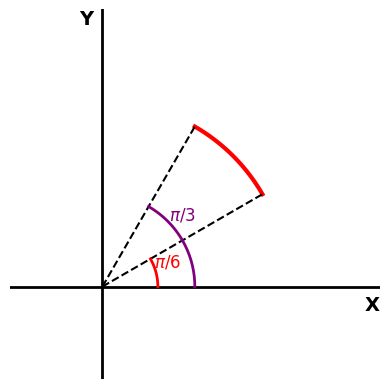

In [11]:
import matplotlib.pyplot as plt
import numpy as np
axis_linewidth = 2
angle_start = np.pi / 6      # π/6
angle_end = np.pi / 3        # π/3
radius_main_arc = 1.0
radius_angle_arc_cyan = 0.3
radius_angle_arc_purple = 0.5

# --- Create Figure and Axes ---
# Matplotlib graphs data on Figures, each containing one or more Axes
fig, ax = plt.subplots()

# --- Customize Axes to look like the image ---
# Hide the default rectangular frame (spines)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

# Draw thick X and Y axes lines passing through the origin (0,0)
ax.axhline(0, color='black', linewidth=axis_linewidth)
ax.axvline(0, color='black', linewidth=axis_linewidth)

# Add 'X' and 'Y' labels near the ends of the drawn axes
# Adjust xlim/ylim first to place labels relative to the final view
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.text(1.5, -0.05, 'X', ha='right', va='top', fontsize=14, fontweight='bold')
ax.text(-0.05, 1.5, 'Y', ha='right', va='top', fontsize=14, fontweight='bold')

# --- Plot the Red Arc ---
# Generate angles for the arc
theta_red = np.linspace(angle_start, angle_end, 100) # 100 points for a smooth curve
# Calculate x and y coordinates using polar to Cartesian conversion
x_red = radius_main_arc * np.cos(theta_red)
y_red = radius_main_arc * np.sin(theta_red)
# The plot() function draws points or lines
ax.plot(x_red, y_red, color='red', linewidth=3)

# --- Plot the Dashed Lines from Origin ---
# Line to the start of the red arc
ax.plot([0, radius_main_arc * np.cos(angle_start)],
    [0, radius_main_arc * np.sin(angle_start)],
    color='black', linestyle='--')
# Line to the end of the red arc
ax.plot([0, radius_main_arc * np.cos(angle_end)],
    [0, radius_main_arc * np.sin(angle_end)],
    color='black', linestyle='--')

# --- Plot the Angle Indicator Arcs ---
# Red arc (0 to pi/6) - Changed from cyan to red
theta_cyan = np.linspace(0, angle_start, 50)
x_cyan = radius_angle_arc_cyan * np.cos(theta_cyan)
y_cyan = radius_angle_arc_cyan * np.sin(theta_cyan)
ax.plot(x_cyan, y_cyan, color='red', linewidth=2)  # Changed from cyan to red

# Purple arc (0 to pi/3)
theta_purple = np.linspace(0, angle_end, 50) # Angle goes up to pi/3
x_purple = radius_angle_arc_purple * np.cos(theta_purple)
y_purple = radius_angle_arc_purple * np.sin(theta_purple)
ax.plot(x_purple, y_purple, color='purple', linewidth=2)

# --- Add Angle Labels (using LaTeX for pi symbol) ---
# Label for pi/6
label_angle_cyan = angle_start * 0.7 # Position label partway along the arc's angle
label_r_cyan = radius_angle_arc_cyan + 0.08 # Position label slightly outside the arc
ax.text(label_r_cyan * np.cos(label_angle_cyan), label_r_cyan * np.sin(label_angle_cyan),
    r'$\pi/6$', ha='center', va='center', fontsize=12, color='red')  # Changed from cyan to red

# Label for pi/3
label_angle_purple = angle_end * 0.7 # Position label partway along the arc's angle
label_r_purple = radius_angle_arc_purple + 0.08 # Position label slightly outside the arc
ax.text(label_r_purple * np.cos(label_angle_purple), label_r_purple * np.sin(label_angle_purple),
    r'$\pi/3$', ha='center', va='center', fontsize=12, color='purple')

# --- Final Adjustments ---
# Ensure the aspect ratio is equal, so circles appear as circles
ax.set_aspect('equal', adjustable='box')

# Hide the numerical ticks on the axes
ax.set_xticks([])
ax.set_yticks([])

# --- Display the Plot ---
plt.show()


In [ ]:
import sympy as sp

def solve_symbolically():

    phi = sp.Symbol('phi')
    r = 3
    

    x = r * sp.cos(phi)
    y = r * sp.sin(phi)
    

    J_x = 3 * y
    J_y = 4
    B_z = 3 * x
    
    
    JxB_x = J_y * B_z        
    JxB_y = -J_x * B_z       
    
    
    dF_x = JxB_x * r
    dF_y = JxB_y * r
    
    # Integrate from π/6 to π/3
    F_x = sp.integrate(dF_x, (phi, sp.pi/6, sp.pi/3))
    F_y = sp.integrate(dF_y, (phi, sp.pi/6, sp.pi/3))
    
    return F_x, F_y

F_x, F_y = solve_symbolically()
print(f"F_x = {F_x}")
print(f"F_y = {F_y}")
print(f"F_x ≈ {float(F_x.evalf())}")
print(f"F_y ≈ {float(F_y.evalf())}")


F_x = -54 + 54*sqrt(3)
F_y = -243/4
F_x ≈ 39.530743608719376
F_y ≈ -60.75
